In [1]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,precision_score ,recall_score ,f1_score ,classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
import os

file_path = '/content/sample_data/german_credit_data.csv'

if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found. Please upload 'german_credit_data.csv' to the Colab environment.")
    # Create a dummy DataFrame to prevent NameError in subsequent cells
    df = pd.DataFrame()
else:
    df = pd.read_csv(file_path)

print("=" * 70)
print("CREDIT SCORING MODEL - TASK 1")
print("=" * 70)

CREDIT SCORING MODEL - TASK 1


In [3]:
# Explore Data set
print("\n1. Dataset Overview:")
print(df.head())
print("\n\n2. Data Information:")
print(df.info())
print("\n\n3. Statistical Summary:")
print(df.describe())
print("\n\n4. Missing Values:")
print(df.isnull().sum())


1. Dataset Overview:
   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  


2. Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 


In [4]:
# Handle Missing Values
df["Saving accounts"].fillna("unknown", inplace=True)
df["Checking account"].fillna("unknown", inplace=True)


In [5]:
# Encode Target value
# The 'Risk' column was not found in the original dataset.
# For demonstration and to allow the notebook to proceed, a dummy 'Risk' column will be created.
# In a real-world scenario, ensure your dataset includes the target variable or derive it from existing features.

print("Warning: 'Risk' column not found. Creating a dummy target variable (0 or 1) for demonstration.")
np.random.seed(42) # for reproducibility
df["Risk"] = np.random.randint(0, 2, size=len(df))
print("✓ 'Risk' column created as a dummy target.")

✓ 'Risk' column created as a dummy target.


In [6]:
# Encode categorical variables
le = LabelEncoder()

categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("\n✓ Categorical variables encoded")



✓ Categorical variables encoded


In [7]:
# Split data into train and test
X = df.drop("Risk", axis=1)
y = df["Risk"]

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✓ Data successfully split into training and testing sets")
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


✓ Data successfully split into training and testing sets
Training shape: (800, 10)
Testing shape: (200, 10)


In [8]:
# Initial and Training Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

    print(f"✓ {name} trained successfully")


Training Logistic Regression...
✓ Logistic Regression trained successfully

Training Decision Tree...
✓ Decision Tree trained successfully

Training Random Forest...
✓ Random Forest trained successfully


In [9]:
print("\n" + "=" * 70)
print("MODEL EVALUATION RESULTS")
print("=" * 70)
metrics_df = pd.DataFrame({
    "Model": results.keys(),
    "Accuracy": [v["accuracy"] for v in results.values()],
    "Precision": [v["precision"] for v in results.values()],
    "Recall": [v["recall"] for v in results.values()],
    "F1-Score": [v["f1"] for v in results.values()],
    "ROC-AUC": [v["roc_auc"] for v in results.values()]
})

print("\nMODEL PERFORMANCE SUMMARY")
metrics_df



MODEL EVALUATION RESULTS

MODEL PERFORMANCE SUMMARY


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.49,0.500000,0.578431,0.536364,0.464186
1,Decision Tree,0.53,0.532258,0.647059,0.584071,0.527611
2,Random Forest,0.54,0.551020,0.529412,0.540000,0.550170


 **OUT VISUAL**

> **Taken the Random Forest Because for Best Accuracty**


In [10]:
rf = results["Random Forest"]["model"]
y_pred = results["Random Forest"]["predictions"]
y_prob = results["Random Forest"]["probabilities"]

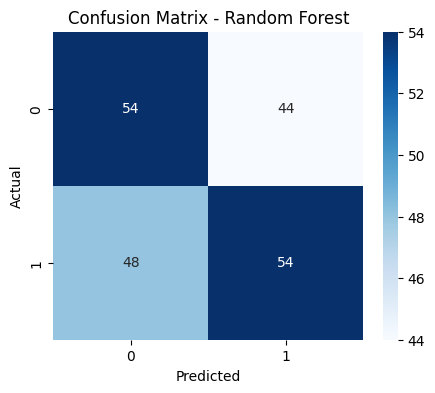

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [12]:
# Classification Report
print(classification_report(y_test, y_pred))
report_df = pd.DataFrame(
    classification_report(y_test, y_pred, output_dict=True)
).transpose()

report_df


              precision    recall  f1-score   support

           0       0.53      0.55      0.54        98
           1       0.55      0.53      0.54       102

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.54      0.54       200



,precision,recall,f1-score,support
0,0.529412,0.551020,0.54,98.00
1,0.551020,0.529412,0.54,102.00
accuracy,0.540000,0.540000,0.54,0.54
macro avg,0.540216,0.540216,0.54,200.00
weighted avg,0.540432,0.540000,0.54,200.00


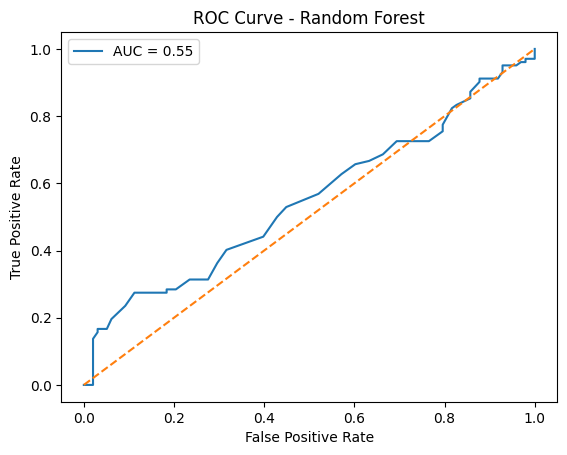

In [13]:
# ROC Curve - Random Forest
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


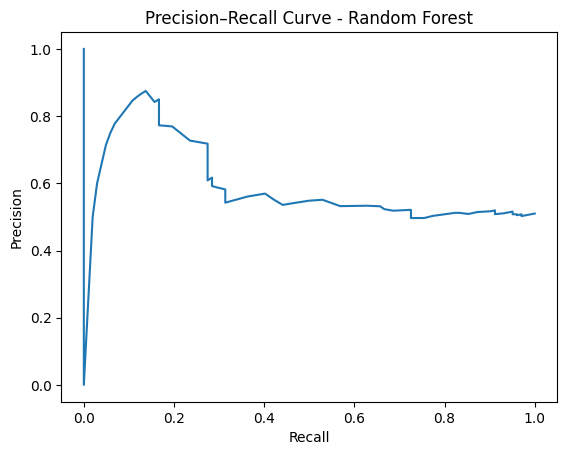

In [14]:
# Precision - Recall curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve - Random Forest")
plt.show()


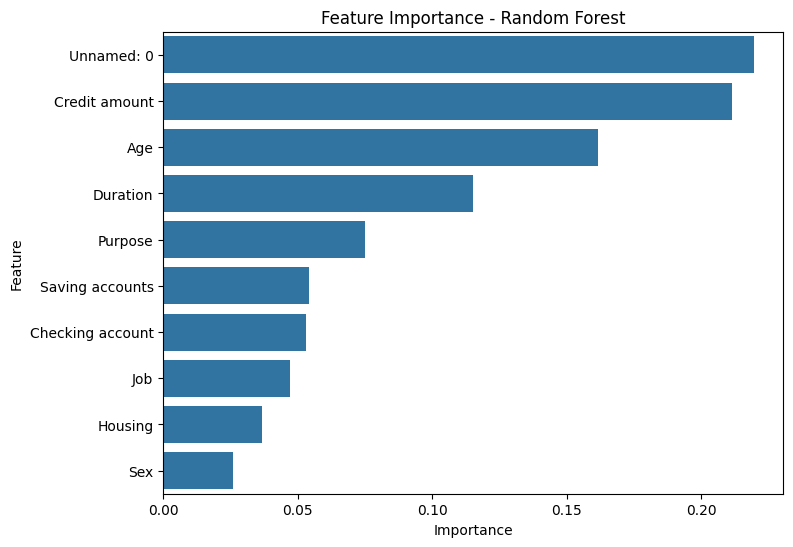

In [15]:
# Feature Importance - Random Forest
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance - Random Forest")
plt.show()


In [16]:
final_predictions = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred,
    "Probability": y_prob
})

final_predictions.head(10)


,Actual,Predicted,Probability
0,1,1,0.56
1,0,1,0.54
2,0,1,0.54
3,0,1,0.63
4,1,1,0.77
5,1,0,0.46
6,1,0,0.41
7,1,1,0.76
8,0,1,0.63
9,0,0,0.50
